In [1]:
## Compare Johnstone Strait New versus TJ

In [3]:
import datetime as dt
import matplotlib.pyplot as plt
import xarray as xr

In [23]:
# Compare to Tereza
def plot_comparison(date):
    bc_phys = xr.open_dataset(f'DICTA_v20250708_y{date.year}.nc')
    if date.year > 1950:
        bc_chem = xr.open_dataset('/home/sallen/MEOPAR/tracers/north/Dosser_north_TEOS10_DICTA.nc')
    else:
        bc_chem = xr.open_dataset('/home/sallen/MEOPAR/ANALYSIS/analysis_tereza/notebooks/PI_CARBON_PAPER/PI_BOUND_COND/CLEAN/preind_DIC/JS_diseq_preind_DIC_allup.nc',
                             group='preindustrial_DIC') 

    fig, axs = plt.subplots(3, 4, figsize=(15, 15))
    #
    irow = 0
    icol = 0
    for month in range(1, 13):
        if date.year > 1950:
             bc_chem.DIC[month-1, :, 0, 0].plot(ax=axs[irow, icol], y='deptht', yincrease=False, color='tab:red', label='TJ');
        else:
            axs[irow, icol].plot(bc_chem.preind_dic[month-1, :, 0, 0], bc_phys.deptht, color='tab:red', label='TJ')
        bc_phys.DIC_JS_uMol[month-1, :, 0, 0].plot(ax=axs[irow,icol], y='deptht', yincrease=False, color='tab:blue', label='New');
        axs[irow, icol].grid();
        axs[irow, icol].set_ylim(340, 0)
        axs[irow, icol].set_xlim(1920, 2200)
        if icol < 3:
            icol += 1
        else:
            irow += 1
            icol = 0
    axs[0, 0].legend()
    fig.suptitle(date)
    fig.tight_layout();

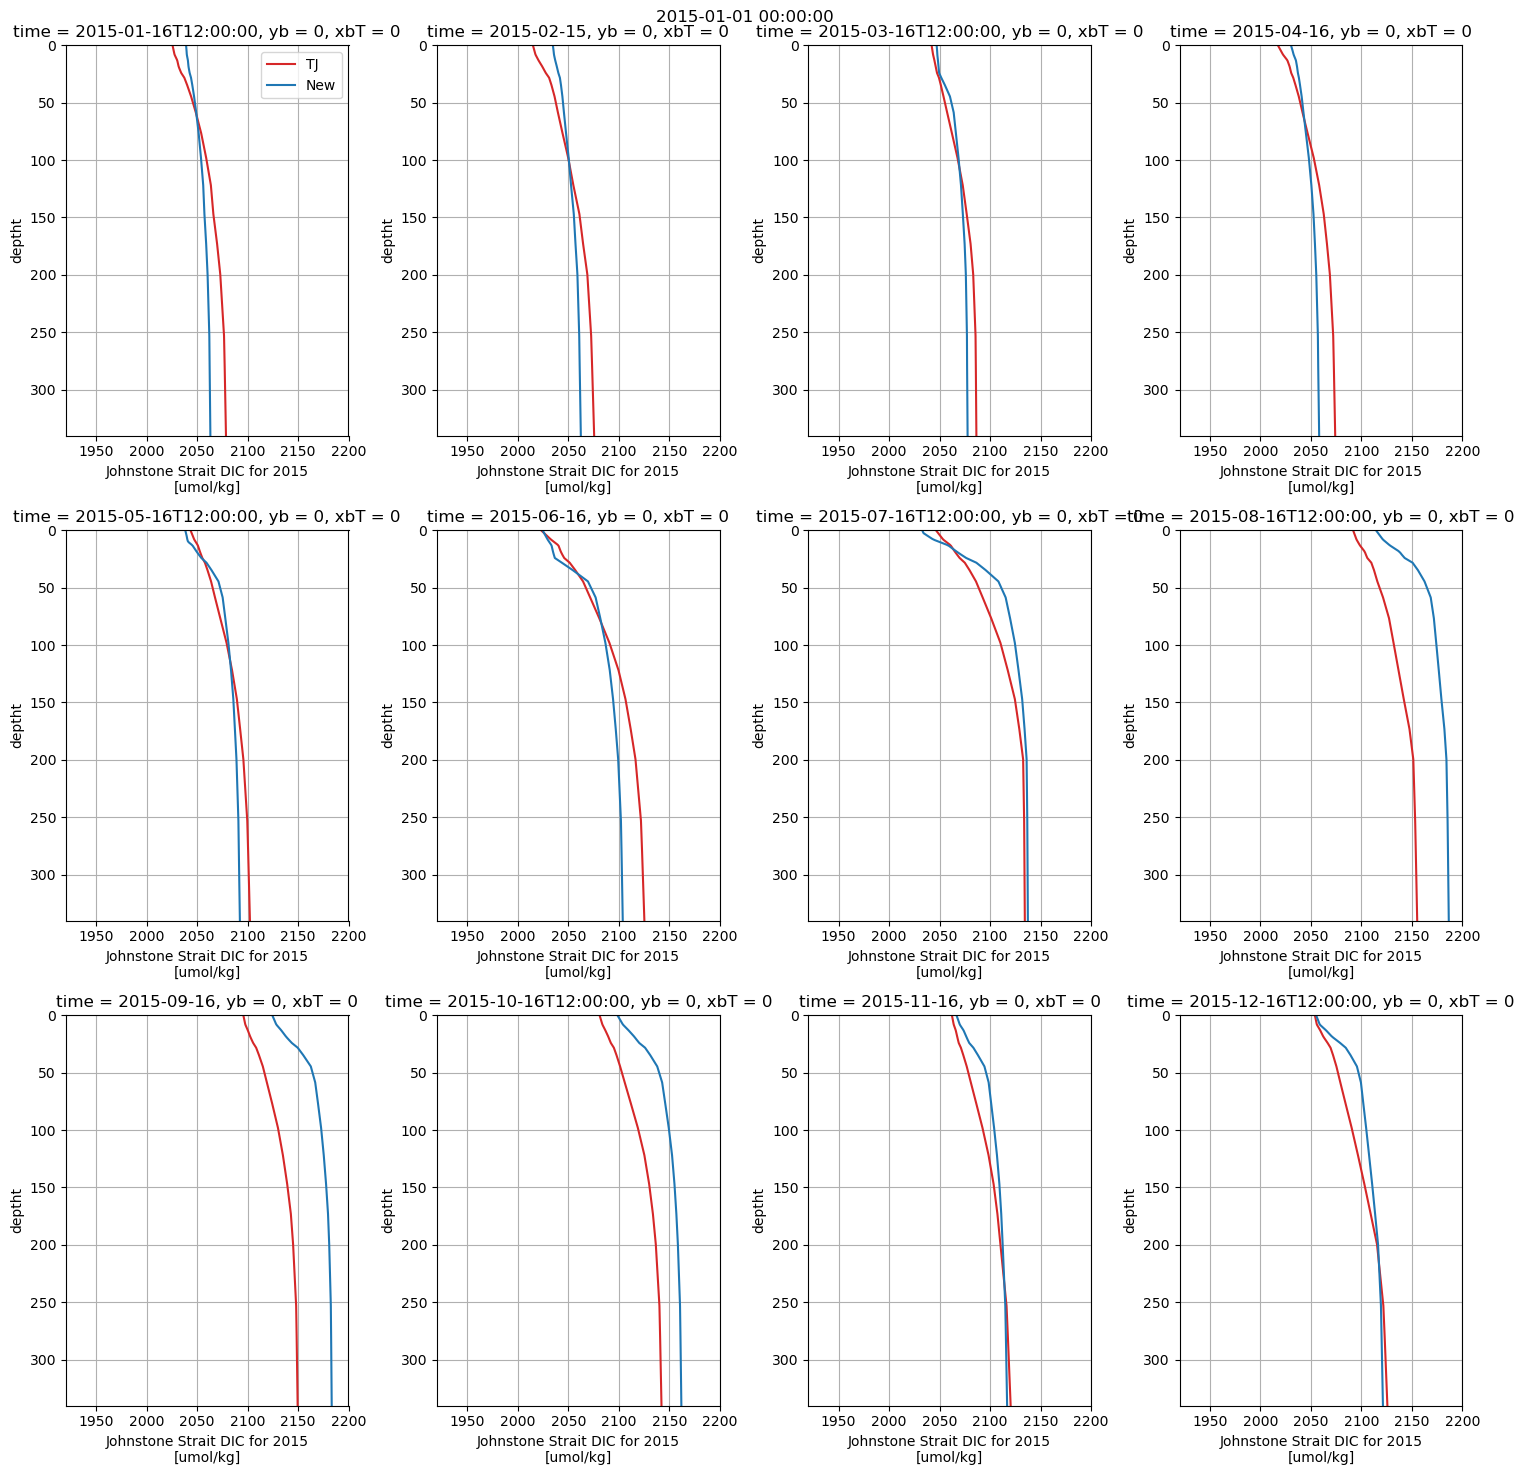

In [24]:
date = dt.datetime(2015, 1, 1)
plot_comparison(date)

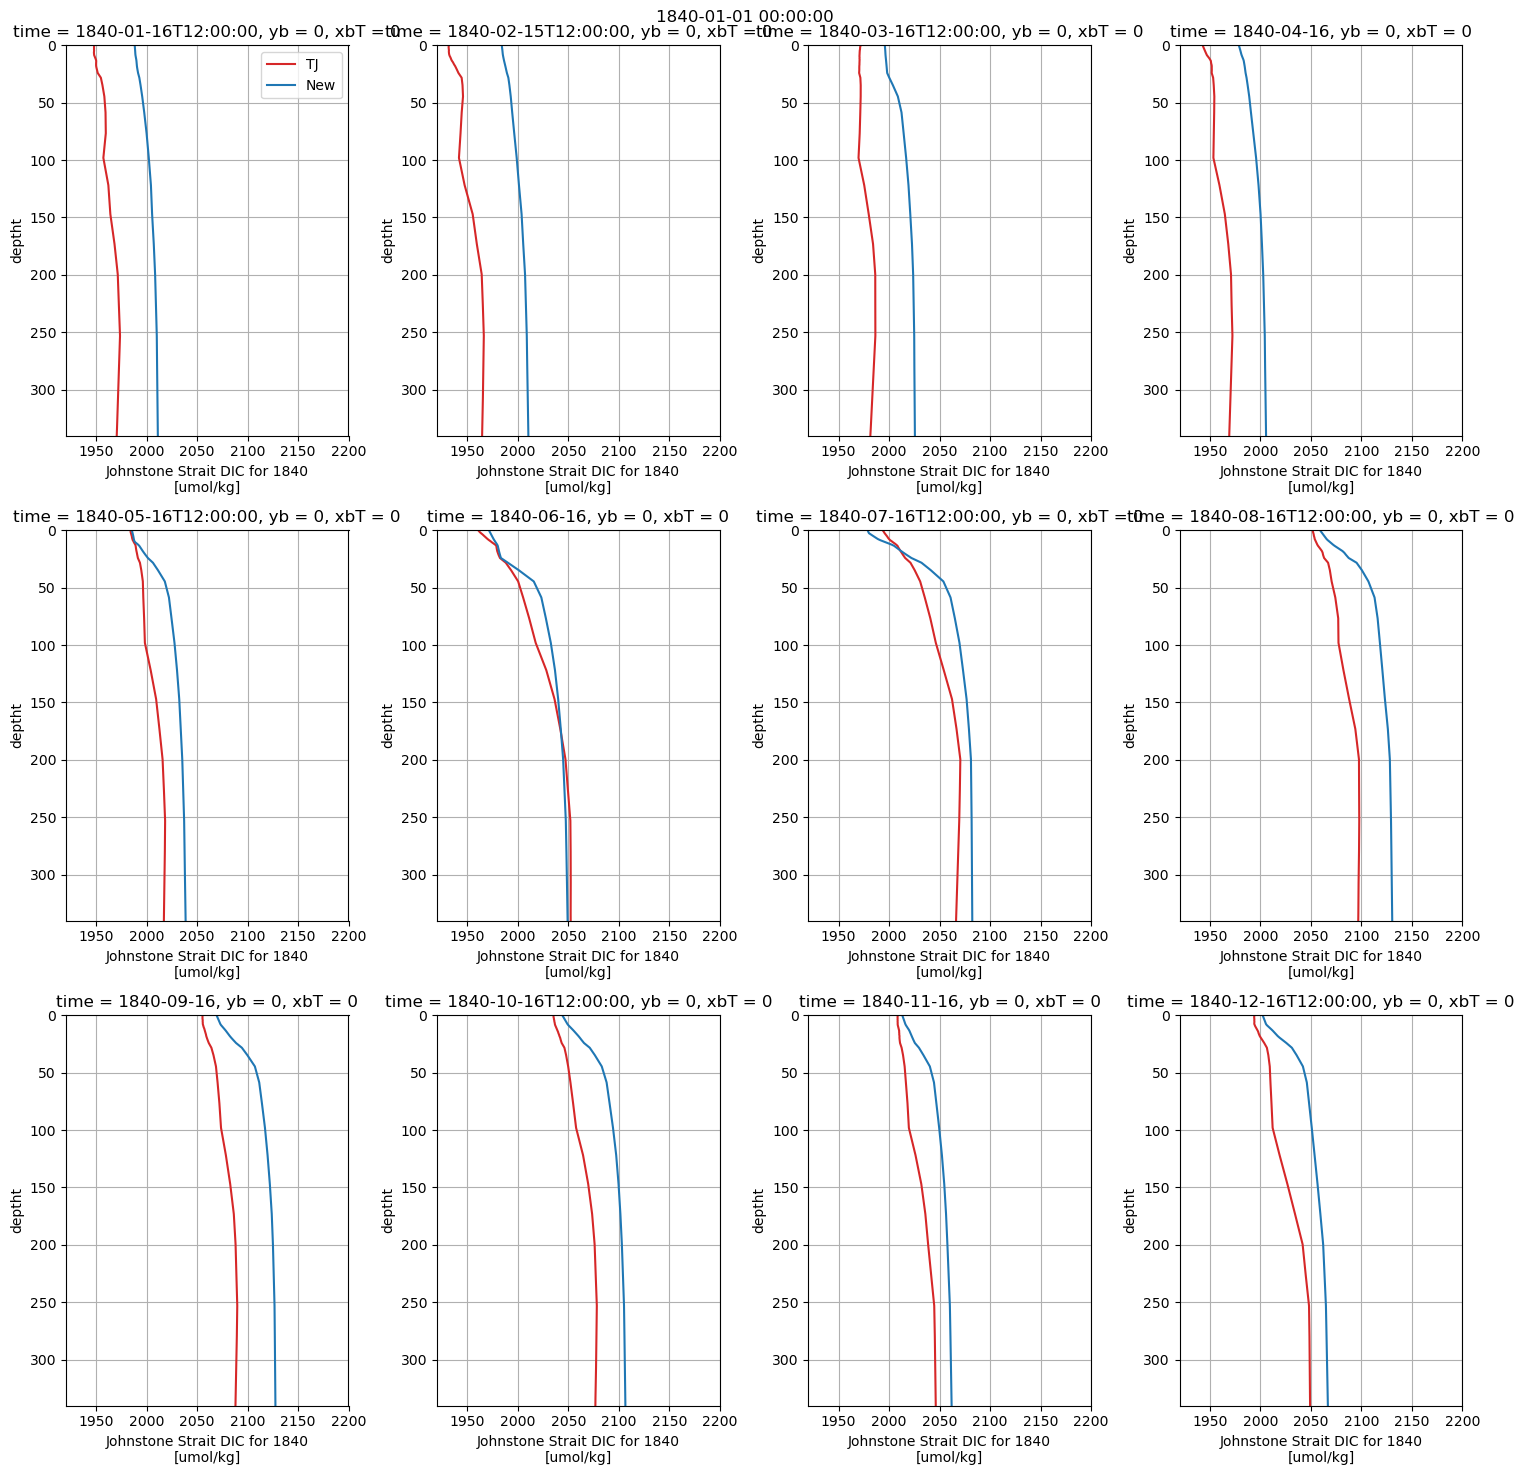

In [25]:
date = dt.datetime(1840, 1, 1)
plot_comparison(date)